Etapa1: 1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.listdir("/content/drive/MyDrive/datasets")

['marketing.csv',
 'clientes.csv',
 'ventas.csv',
 'ventas_clean.csv',
 'clientes_clean.csv',
 'marketing_clean.csv']

In [4]:
ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

# Cargamos los CSV como DataFrames.
ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

In [5]:
# Analisis exploratorio del dataset
def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("shape:", df.shape)
    print("columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [6]:
eda(ventas, "Ventas")
eda(clientes, "Clientes")
eda(marketing, "Marketing")

=== Ventas ===
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------
=== Clientes ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------
=== Marketing ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


In [7]:
# Analizo valores nulos
print("\nCantidad de valores nulos por columna de ventas:")
display(ventas.isna().sum().to_frame("nulos"))

print("\nCantidad de valores nulos por columna de marketing:")
display(marketing.isna().sum().to_frame("nulos"))

print("\nCantidad de valores nulos por columna de clientes:")
display(clientes.isna().sum().to_frame("nulos"))


Cantidad de valores nulos por columna de ventas:


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0



Cantidad de valores nulos por columna de marketing:


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0



Cantidad de valores nulos por columna de clientes:


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


In [8]:
# Eliminamos duplicados
duplicados_ventas = ventas.duplicated().sum()
duplicados_clientes = clientes.duplicated().sum()
duplicados_marketing = marketing.duplicated().sum()
print("Duplicados en el set de Ventas: ",duplicados_ventas)
print("Duplicados en el set de Clientes: ",duplicados_clientes)
print("Duplicados en el set de Marketing: ",duplicados_marketing)

ventas_sin_dupl = ventas.drop_duplicates().copy()
clientes_sin_dupl = clientes.drop_duplicates().copy()
marketing_sin_dupl = marketing.drop_duplicates().copy()

Duplicados en el set de Ventas:  35
Duplicados en el set de Clientes:  0
Duplicados en el set de Marketing:  0


In [9]:
# Verificacion de tipos de datos
ventas_sin_dupl.info()
clientes_sin_dupl.info()
marketing_sin_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3000 non-null   int64  
 1   producto     3000 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  3000 non-null   object 
 5   categoria    3000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [10]:
# Cambio el tipo y formato de las fechas
ventas_sin_dupl.fecha_venta = pd.to_datetime(ventas_sin_dupl.fecha_venta,format="%d/%m/%Y")
marketing_sin_dupl.fecha_inicio = pd.to_datetime(marketing_sin_dupl.fecha_inicio,format="%d/%m/%Y")
marketing_sin_dupl.fecha_fin = pd.to_datetime(marketing_sin_dupl.fecha_fin,format="%d/%m/%Y")

In [11]:
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )
    return df

In [12]:
ventas_clean = normalizar_texto(ventas_sin_dupl)
clientes_clean = normalizar_texto(clientes_sin_dupl)
marketing_clean = normalizar_texto(marketing_sin_dupl)

In [13]:
print(ventas_clean.head(10))
print(clientes_clean.head(10))
print(marketing_clean.head(10))

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02   
2      1156           Secadora   $97.96       3.0  2024-01-02   
3      1372           Heladera  $114.35       8.0  2024-01-02   
4      1546           Secadora  $106.21       4.0  2024-01-02   
5      1697    Horno Eléctrico   $35.35       9.0  2024-01-02   
6      1710   Plancha De Vapor   $65.43       2.0  2024-01-02   
7      2959          Proyector   $88.17       9.0  2024-01-02   
8       318  Rincón De Plantas   $79.86      11.0  2024-01-03   
9       419         Candelabro   $66.11       8.0  2024-01-03   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  
8         Decoración  
9         Decoración  
   id_cliente               nom

In [14]:
if "precio" in ventas_clean.columns:
    # Se usa nuevamente agrupación con () para encadenar métodos y mantener legibilidad
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        #   "$" → texto literal a reemplazar
        #   ""  → nuevo valor (vacío)
        #   regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios sobrantes
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")

In [15]:
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")

In [16]:
ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB


In [17]:
def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

In [18]:
print(reporte_calidad_global([ventas, clientes, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


In [19]:
ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)

In [20]:
resumen_prod = ventas_perf.groupby(by="producto").agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))

In [21]:
percentil80_ingreso = resumen_prod.ingreso_total.quantile(q=0.8)
ventas_top = resumen_prod[resumen_prod["ingreso_total"]>percentil80_ingreso].sort_values(by=["ingreso_total", "unidades"],ascending=[False, False],na_position="last",ignore_index=False)
print(f"Umbral (percentil 80) de ingreso_total: {float(percentil80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(60))

Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,ingreso_total,unidades,precio_promedio,registros
producto,,,,
Lámpara De Mesa,82276.38,1112,72.720625,176
Auriculares,74175.58,958,76.302727,143
Microondas,72562.89,912,79.176000,135
Cafetera,59607.31,765,79.046581,117
Cuadro Decorativo,54297.6,726,74.578000,100
Smartphone,54132.44,665,81.398416,101


In [22]:
ventas_cat = ventas_perf.copy()
ventas_cat

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.8
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84
...,...,...,...,...,...,...,...
3030,1837,Horno Eléctrico,104.12,9,2024-12-30,Electrodomésticos,937.08
3031,2276,Laptop,85.27,9,2024-12-30,Electrónica,767.43
3032,2696,Laptop,107.81,4,2024-12-30,Electrónica,431.24
3033,2913,Smartphone,99.85,7,2024-12-30,Electrónica,698.95


In [23]:
resumen_cat = ventas_cat.groupby(by="categoria",as_index=False).agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'),ventas=('ingreso', 'size'),precio_promedio=('precio', 'mean')).sort_values(by='ingreso_total',ascending=False,na_position='last',ignore_index=True)
resumen_cat.head()

,categoria,ingreso_total,unidades,ventas,precio_promedio
0,Electrodomésticos,505299.63,6592,1000,76.52096
1,Electrónica,482577.8,6413,999,75.25492
2,Decoración,479216.09,6490,1001,74.09800


In [24]:
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
)

In [25]:
print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))

Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


In [26]:
df_ventas_x_producto = ventas_perf.groupby('producto').agg(
    precio_por_cantidad=('ingreso', 'sum')
).sort_values(by='producto', ascending=True)
display(df_ventas_x_producto.head())

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.2


In [27]:
df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']]
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True)
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [28]:
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.2,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.8,14.65,0.13164
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.6,15.85,0.029191


In [29]:
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.2,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.8,14.65,0.13164
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.6,15.85,0.029191


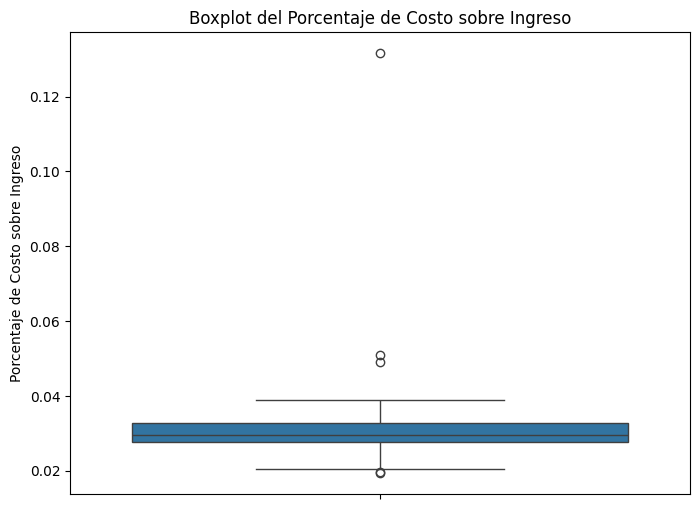

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()

Se agrega un violin plot para visualizar mejor la densidad de datos


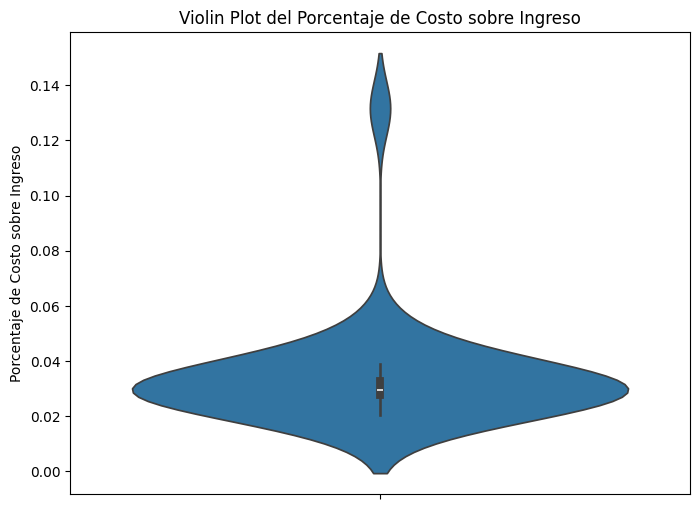

In [31]:
print("Se agrega un violin plot para visualizar mejor la densidad de datos")
plt.figure(figsize=(8, 6))
sns.violinplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Violin Plot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()

In [32]:
ventas_mensuales = ventas_cat.copy()
ventas_mensuales['año_mes'] = ventas_mensuales['fecha_venta'].dt.to_period('M')

# Agrupamos por 'año_mes' y calculamos las métricas
resumen_mensual = ventas_mensuales.groupby('año_mes').agg(
    ingreso_total=('ingreso', 'sum'),
    unidades_vendidas=('cantidad', 'sum'),
    ventas_totales=('ingreso', 'size'),
    precio_promedio=('precio', 'mean')
).reset_index()

print("✅ Resumen de ventas agrupado por mes y año:")
display(resumen_mensual.head())

✅ Resumen de ventas agrupado por mes y año:


,año_mes,ingreso_total,unidades_vendidas,ventas_totales,precio_promedio
0,2024-01,129604.99,1741,270,74.990075
1,2024-02,118672.44,1607,248,74.913790
2,2024-03,136779.15,1792,265,75.769547
3,2024-04,128430.69,1715,275,74.537055
4,2024-05,143727.25,1812,275,77.984982


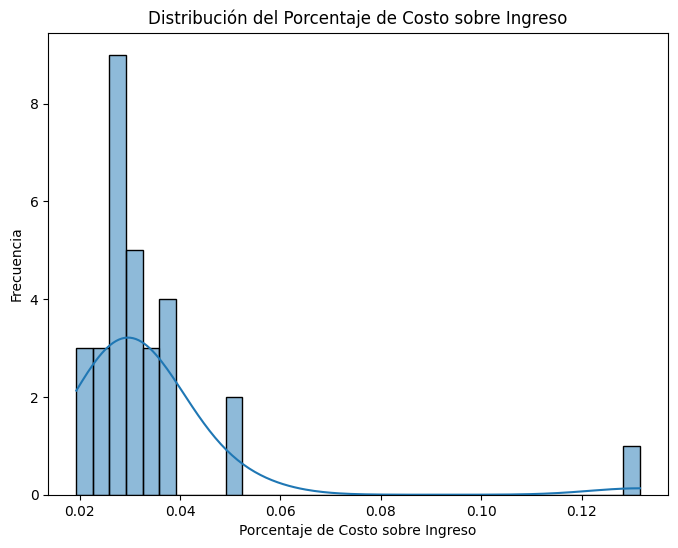

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

In [34]:
df = resumen_prod.copy().reset_index()
df.head()

,producto,ingreso_total,unidades,precio_promedio,registros
0,Adorno De Pared,48093.49,633,76.097800,100
1,Alfombra,44773.06,615,74.098300,100
2,Aspiradora,50085.86,651,77.447400,100
3,Auriculares,74175.58,958,76.302727,143
4,Batidora,50979.2,672,77.537200,100


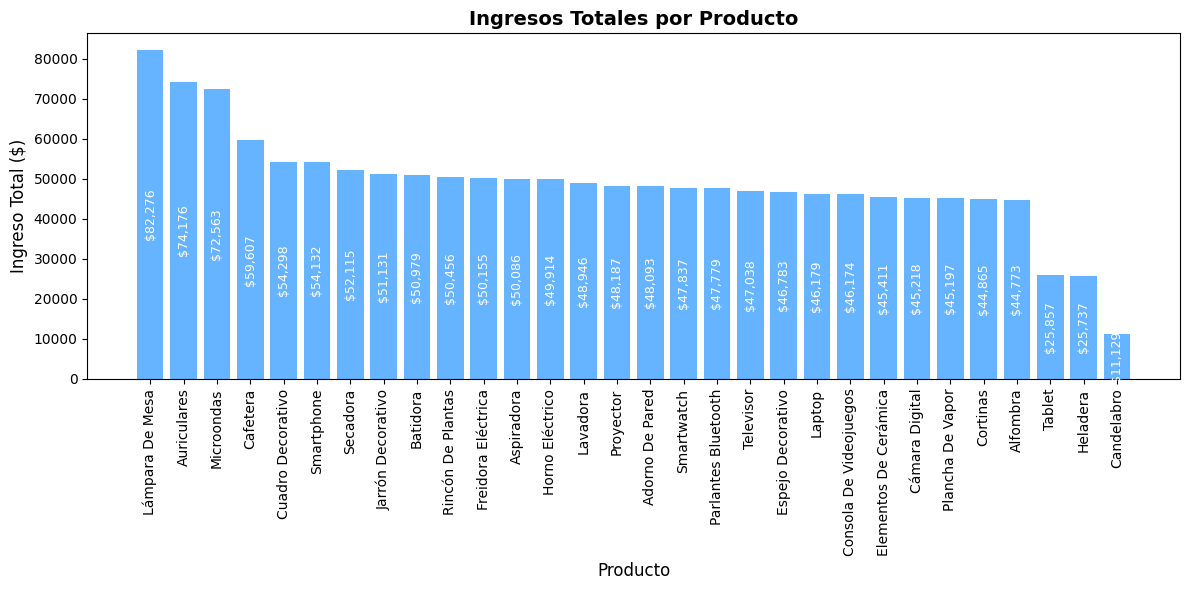

In [35]:
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 6))

# Definimos un color celeste agradable para las barras
color_celeste = "#66b3ff"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

Análisis de Tendencias Temporales

In [36]:
ventas_cat

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.8
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84
...,...,...,...,...,...,...,...
3030,1837,Horno Eléctrico,104.12,9,2024-12-30,Electrodomésticos,937.08
3031,2276,Laptop,85.27,9,2024-12-30,Electrónica,767.43
3032,2696,Laptop,107.81,4,2024-12-30,Electrónica,431.24
3033,2913,Smartphone,99.85,7,2024-12-30,Electrónica,698.95


In [37]:
ventas_fecha = ventas_cat.copy()
ventas_fecha["fecha_mes"] = pd.to_datetime(ventas_fecha["fecha_venta"].dt.year.astype(str) + "-" + ventas_fecha["fecha_venta"].dt.month.astype(str))
ventas_fecha.head(3)

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso,fecha_mes
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7,2024-01-01
1,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5,2024-01-01
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88,2024-01-01


In [38]:
ventas_fecha_agrupadas = ventas_fecha.groupby(by="fecha_mes").agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'),ventas=('ingreso', 'size'),precio_promedio=('precio', 'mean'),cantidad_transacciones=('id_venta', 'count'))
ventas_fecha_agrupadas

,ingreso_total,unidades,ventas,precio_promedio,cantidad_transacciones
fecha_mes,,,,,
2024-01-01,129604.99,1741,270,74.990075,270
2024-02-01,118672.44,1607,248,74.913790,248
2024-03-01,136779.15,1792,265,75.769547,265
2024-04-01,128430.69,1715,275,74.537055,275
2024-05-01,143727.25,1812,275,77.984982,275
2024-06-01,108480.17,1426,221,76.176516,221
2024-07-01,116229.97,1547,243,74.831770,243
2024-08-01,119680.15,1614,254,75.696654,254
2024-09-01,115787.85,1576,241,73.831826,241


In [39]:
! locale-gen es_ES.UTF-8

Generating locales (this might take a while)...
  es_ES.UTF-8... done
Generation complete.


In [42]:
import locale
# Pasamos los meses a su nombre en español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
idx = ventas_fecha_agrupadas.index
ventas_fecha_agrupadas.index = idx.month_name(locale='es_ES.UTF-8')
ventas_fecha_agrupadas

,ingreso_total,unidades,ventas,precio_promedio,cantidad_transacciones
fecha_mes,,,,,
Enero,129604.99,1741,270,74.990075,270
Febrero,118672.44,1607,248,74.913790,248
Marzo,136779.15,1792,265,75.769547,265
Abril,128430.69,1715,275,74.537055,275
Mayo,143727.25,1812,275,77.984982,275
Junio,108480.17,1426,221,76.176516,221
Julio,116229.97,1547,243,74.831770,243
Agosto,119680.15,1614,254,75.696654,254
Septiembre,115787.85,1576,241,73.831826,241


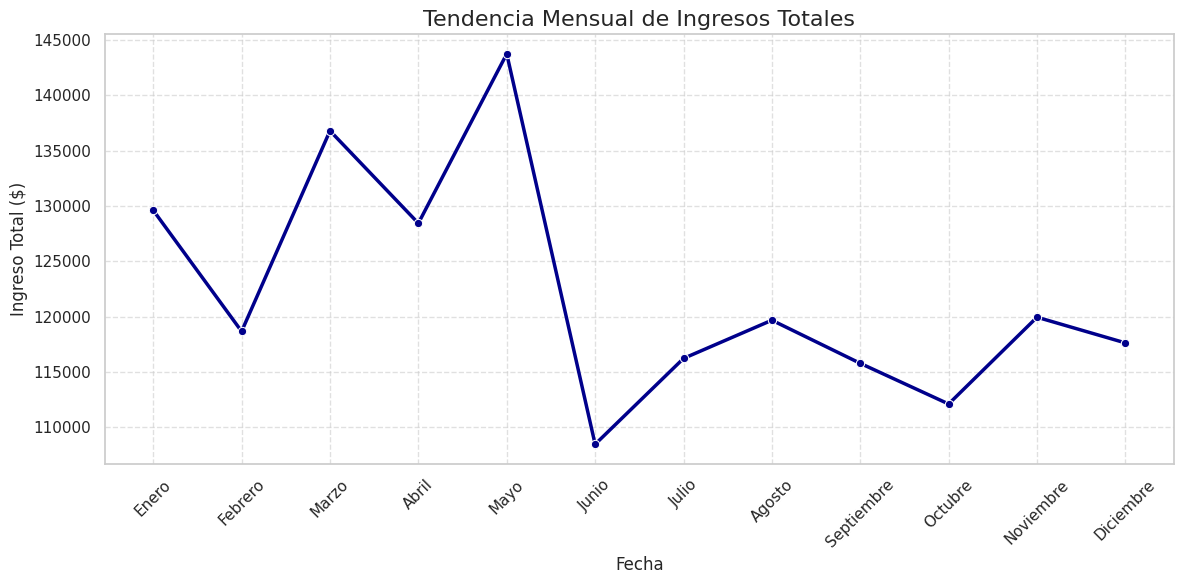

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(
    x=ventas_fecha_agrupadas.index,
    y='ingreso_total',
    data=ventas_fecha_agrupadas,
    marker='o',
    color='darkblue',
    linewidth=2.5
)
plt.title('Tendencia Mensual de Ingresos Totales', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-27581404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


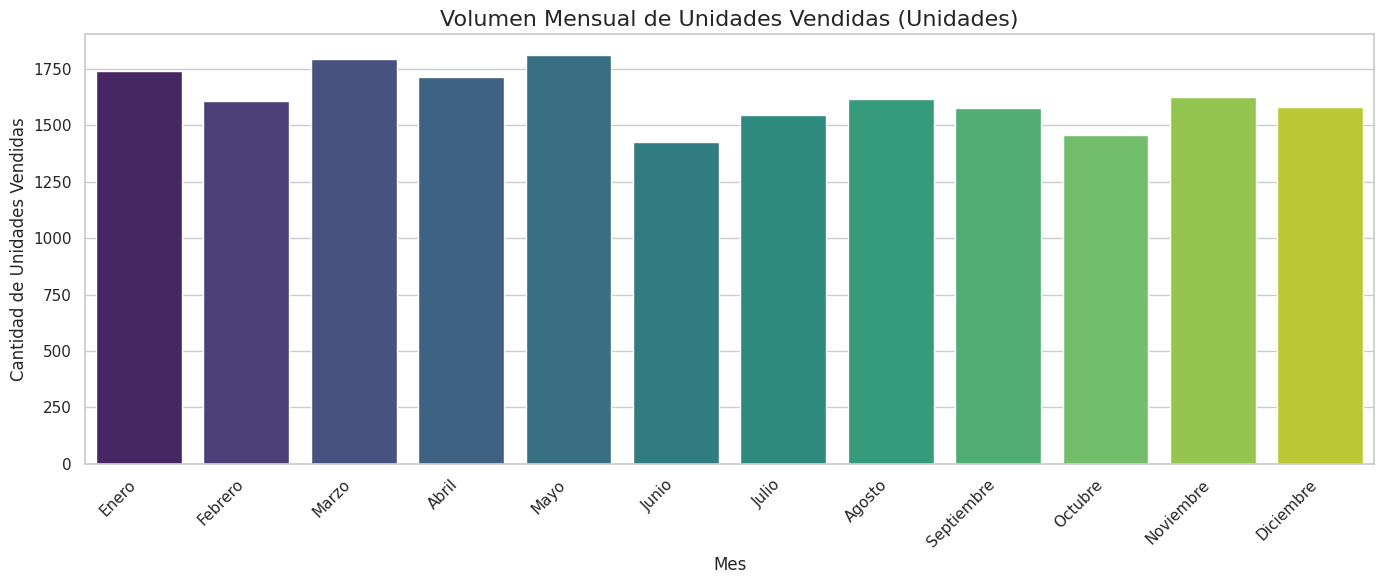

In [47]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 6))

# Creamos el gráfico de barras
sns.barplot(
    x=ventas_fecha_agrupadas.index,        # Eje X: El nombre del mes en español
    y='unidades',              # Eje Y: Cantidad de ítems vendidos
    data=ventas_fecha_agrupadas,
    palette="viridis"          # Una paleta de colores vibrante
)

# Títulos y etiquetas
plt.title('Volumen Mensual de Unidades Vendidas (Unidades)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Unidades Vendidas', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura
plt.tight_layout()
plt.show()

In [52]:
# Calcular el coeficiente de correlación de Pearson
correlacion = ventas_cat['precio'].corr(ventas_cat['cantidad'])
print(f"## Coeficiente de Correlación (Precio vs. Cantidad): {correlacion:.4f}")

## Coeficiente de Correlación (Precio vs. Cantidad): -0.0024


In [65]:
ventas_corr=ventas_cat[['precio', 'cantidad']]
ventas_corr

,precio,cantidad
0,69.94,5
1,105.10,5
2,97.96,3
3,114.35,8
4,106.21,4
...,...,...
3030,104.12,9
3031,85.27,9
3032,107.81,4
3033,99.85,7


In [67]:
df_merged = pd.merge(
    ventas_cat,
    marketing_clean,
    on='producto',
    how='left'
)
df_merged.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7,1,Rrss,5.27,2024-04-27,2024-06-04
1,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,349.7,61,Tv,5.30,2024-11-05,2024-12-23
3,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,525.5,2,Rrss,5.88,2024-05-30,2024-06-29


In [69]:
# 4. Filtrar las filas para que solo incluyan las campañas activas
# Una campaña es relevante SOLO si la fecha de venta cae dentro del rango de la campaña
influencia_marketing_ventas = df_merged[
    (df_merged['fecha_venta'] >= df_merged['fecha_inicio']) &
    (df_merged['fecha_venta'] <= df_merged['fecha_fin'])
].copy()
influencia_marketing_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso,id_campanha,canal,costo,fecha_inicio,fecha_fin
2079,950,Adorno De Pared,116.42,6,2024-03-20,Decoración,698.52,74,Tv,4.81,2024-03-20,2024-05-03
2097,780,Adorno De Pared,79.13,7,2024-03-21,Decoración,553.91,74,Tv,4.81,2024-03-20,2024-05-03
2130,270,Adorno De Pared,96.59,6,2024-03-22,Decoración,579.54,74,Tv,4.81,2024-03-20,2024-05-03
2166,210,Adorno De Pared,71.67,4,2024-03-24,Decoración,286.68,74,Tv,4.81,2024-03-20,2024-05-03
2262,730,Adorno De Pared,103.90,8,2024-03-28,Decoración,831.2,74,Tv,4.81,2024-03-20,2024-05-03


In [78]:
kpi_campanhas = influencia_marketing_ventas.groupby('id_campanha').agg(
    Ingreso_Campaña=('ingreso', 'sum'),
    Unidades_Vendidas=('cantidad', 'sum'),
    Costo_Marketing=('costo', 'first'),
    Numero_Ventas=('id_venta', 'nunique'),
    Producto=('producto', 'first'),
    Canal=('canal', 'first')
).reset_index()
# Calcular el Retorno de la Inversión en Marketing (ROI)
# ROI = (Ingreso Generado - Costo de Marketing) / Costo de Marketing
kpi_campanhas['ROI'] = (kpi_campanhas['Ingreso_Campaña'] - kpi_campanhas['Costo_Marketing']) / kpi_campanhas['Costo_Marketing']

# Ordenar por ROI para ver las campañas más efectivas
kpi_campanhas_ordenado = kpi_campanhas.sort_values(by='ROI', ascending=False)
kpi_campanhas_ordenado

,id_campanha,Ingreso_Campaña,Unidades_Vendidas,Costo_Marketing,Numero_Ventas,Producto,Canal,ROI
63,65,8646.68,109,3.08,15,Horno Eléctrico,Tv,2806.363636
46,47,11313.32,140,4.19,21,Auriculares,Email,2699.076372
56,57,10482.29,139,4.48,18,Batidora,Email,2338.796875
53,54,6590.62,87,2.95,13,Parlantes Bluetooth,Email,2233.108475
83,86,9019.92,113,4.25,14,Microondas,Tv,2121.334118
...,...,...,...,...,...,...,...,...
29,30,1048.7,10,4.68,4,Laptop,Rrss,223.081197
66,68,944.0,9,5.81,2,Rincón De Plantas,Tv,161.478485
86,89,681.58,12,4.98,2,Televisor,Tv,135.863454
50,51,193.92,6,4.65,1,Smartphone,Email,40.703226


In [85]:
# Mostrar las 10 mejores campañas por ROI
top_10_roi = kpi_campanhas_ordenado.head(10)

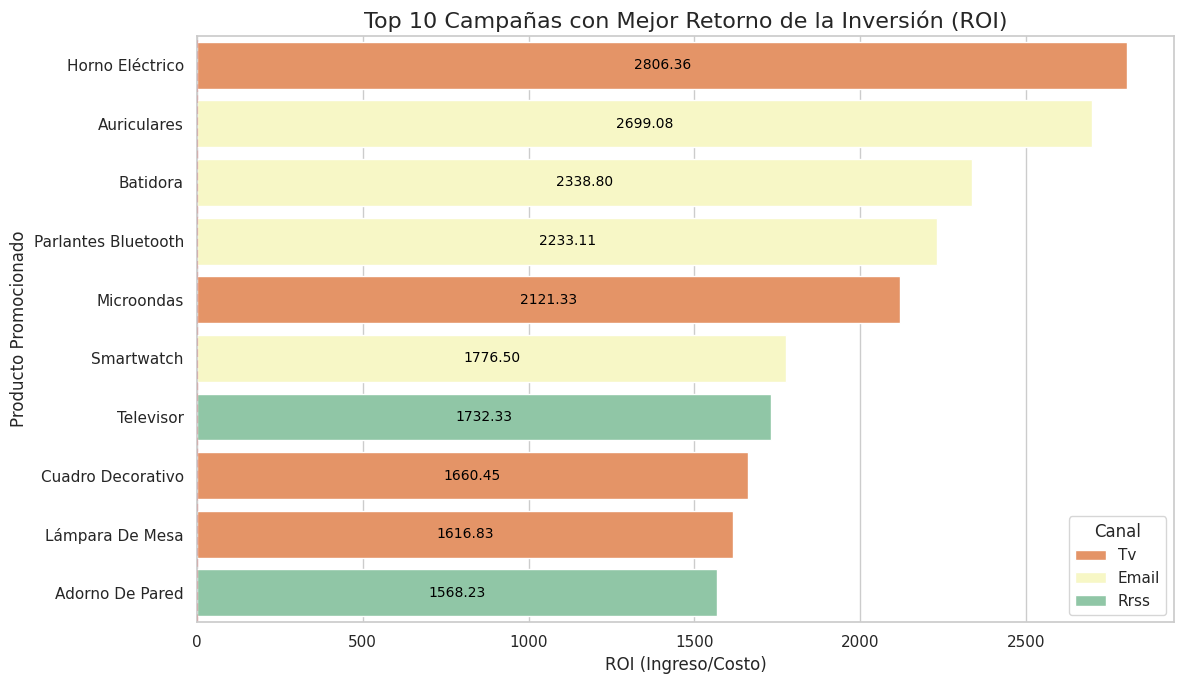

In [91]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Graficar el ROI
ax = sns.barplot(
    x='ROI',
    y='Producto',
    data=top_10_roi,
    hue='Canal',
    dodge=False,
    palette='Spectral'
)

for container in ax.containers:
    for p in container.patches:
        roi_value = p.get_width()
        if roi_value > 0.01: # Solo etiquetar si el ROI es significativo
            ax.text(
                roi_value / 2, # Posición X: centro de la barra
                p.get_y() + p.get_height() / 2, # Posición Y: centro vertical de la barra
                f'{roi_value:.2f}', # Formato el valor del ROI a 2 decimales
                ha='center', # Alineación horizontal: centrada
                va='center', # Alineación vertical: centrada
                fontsize=10,
                color='black' # Texto blanco para contraste
            )

plt.title('Top 10 Campañas con Mejor Retorno de la Inversión (ROI)', fontsize=16)
plt.xlabel('ROI (Ingreso/Costo)', fontsize=12)
plt.ylabel('Producto Promocionado', fontsize=12)
plt.axvline(0, color='red', linestyle='--') # Línea de referencia para ROI = 0
plt.tight_layout()
plt.show()

In [119]:
ingresos_por_ciudad = clientes_clean.groupby('ciudad').agg(
    ingreso_total_ciudad=('ingresos', 'sum'),
    cantidad_clientes=('id_cliente', 'nunique')
).reset_index()

,ciudad,ingreso_total_ciudad,cantidad_clientes
0,Bahía Blanca,1465772.15,44
1,Buenos Aires,1241646.18,36
2,Corrientes,1703494.66,47
3,Córdoba,1672090.94,49
4,Mar Del Plata,2155401.69,63


In [121]:
ingresos_por_ciudad_top = ingresos_por_ciudad.sort_values(
    by='ingreso_total_ciudad', ascending=False
).head(10)

print("\n### Top 10 Ciudades por Ingreso Total Generado ###")
print(ingresos_por_ciudad)


### Top 10 Ciudades por Ingreso Total Generado ###
                   ciudad  ingreso_total_ciudad  cantidad_clientes
0            Bahía Blanca            1465772.15                 44
1            Buenos Aires            1241646.18                 36
2              Corrientes            1703494.66                 47
3                 Córdoba            1672090.94                 49
4           Mar Del Plata            2155401.69                 63
5                   Merlo            1469482.59                 43
6                 Posadas            1823839.02                 52
7             Resistencia            1818533.68                 50
8                 Rosario            1939688.11                 55
9                   Salta            1407872.86                 43
10  San Miguel De Tucumán            1303752.75                 39
11               Santa Fe            1655600.39                 46


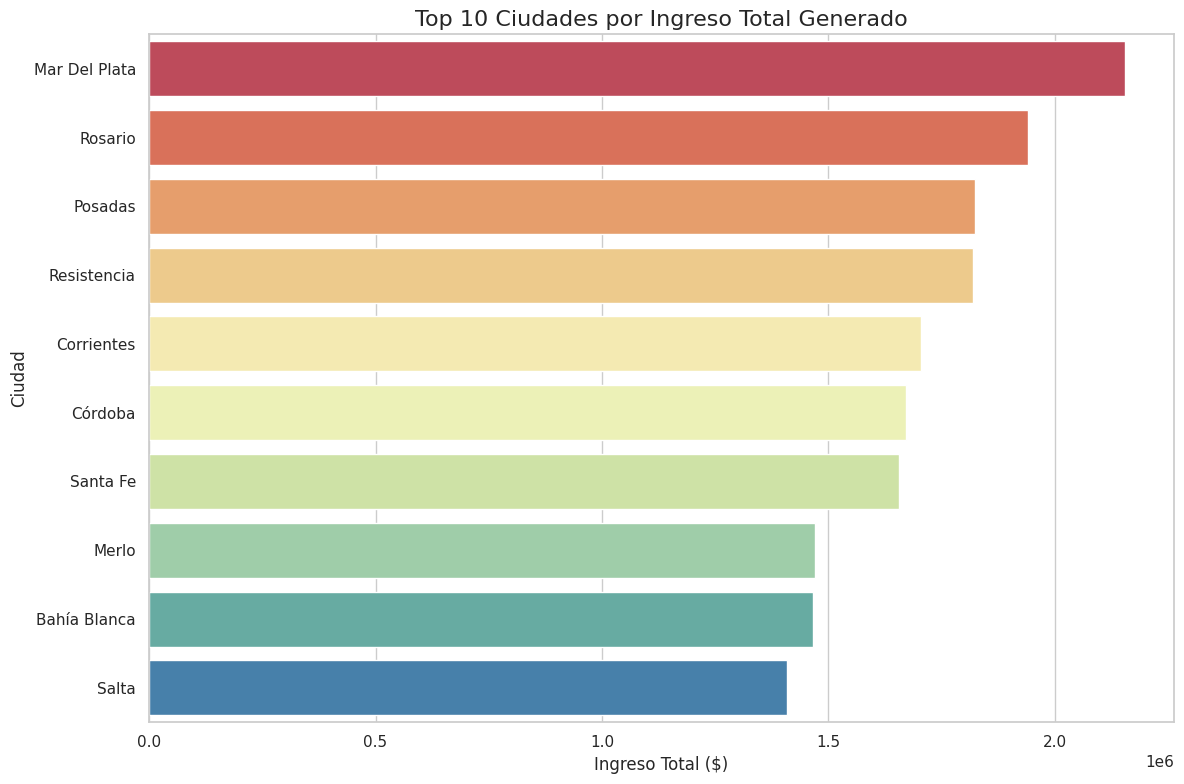

In [128]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(
    x='ingreso_total_ciudad',
    y='ciudad',
    data=ingresos_por_ciudad_top,
    hue='ciudad', # Asignamos 'ciudad' a hue para evitar el warning
    legend=False, # Desactivamos la leyenda si no es necesaria
    palette='Spectral' # Una paleta de colores para destacar la clasificación
)

plt.title('Top 10 Ciudades por Ingreso Total Generado', fontsize=16)
plt.xlabel('Ingreso Total ($)', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.tight_layout()
plt.show()